# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [25]:
#Import all the necessary modules
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [2]:
data = pd.read_csv("Data/pima-indians-diabete.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [3]:
data.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
data.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

# Q3 Print the datatypes of each column and the shape of the dataset 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [7]:
#Raw code to be used in loop
#data.Plas.median()
#data.loc[data.Plas == 0, 'Plas'] = data.Plas.median()
#data.loc[data.Plas == 0]

In [8]:
columns = ['Plas', 'Pres', 'skin','test','mass']
for i in columns:
    data.loc[data[i] == 0, i] = data[i].median()

In [9]:
data.loc[data.Plas == 0]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


In [10]:
data.loc[data.Pres == 0]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


In [11]:
data.loc[data.skin == 0]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


In [12]:
data.loc[data.test == 0]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


In [13]:
data.loc[data.mass == 0]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


# Q5 Print the descriptive statistics of each & every column using describe() function

In [14]:
data.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

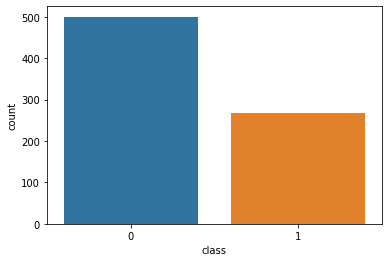

In [15]:
sns.countplot(x='class', data=data)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

### Feature age:

In [16]:
data['age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64

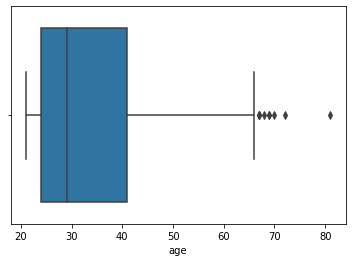

In [17]:
sns.boxplot (x=data['age'])

#### Comments:
- Distribution is right skewed
- Mean and Median are separated
- There are outlier on the right side of the distribution

### Feature Plas

In [18]:
data['Plas'].describe()

count    768.000000
mean     121.656250
std       30.438286
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Plas, dtype: float64

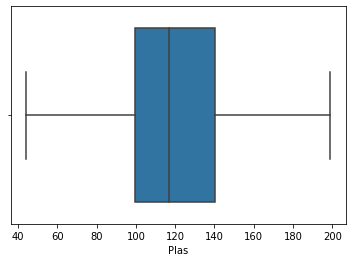

In [19]:
sns.boxplot (x=data['Plas'])

#### Comments:
- The distribution seem to be normally distributed, with closer mean and median
- There are no outliers

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


C:\Install\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Install\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


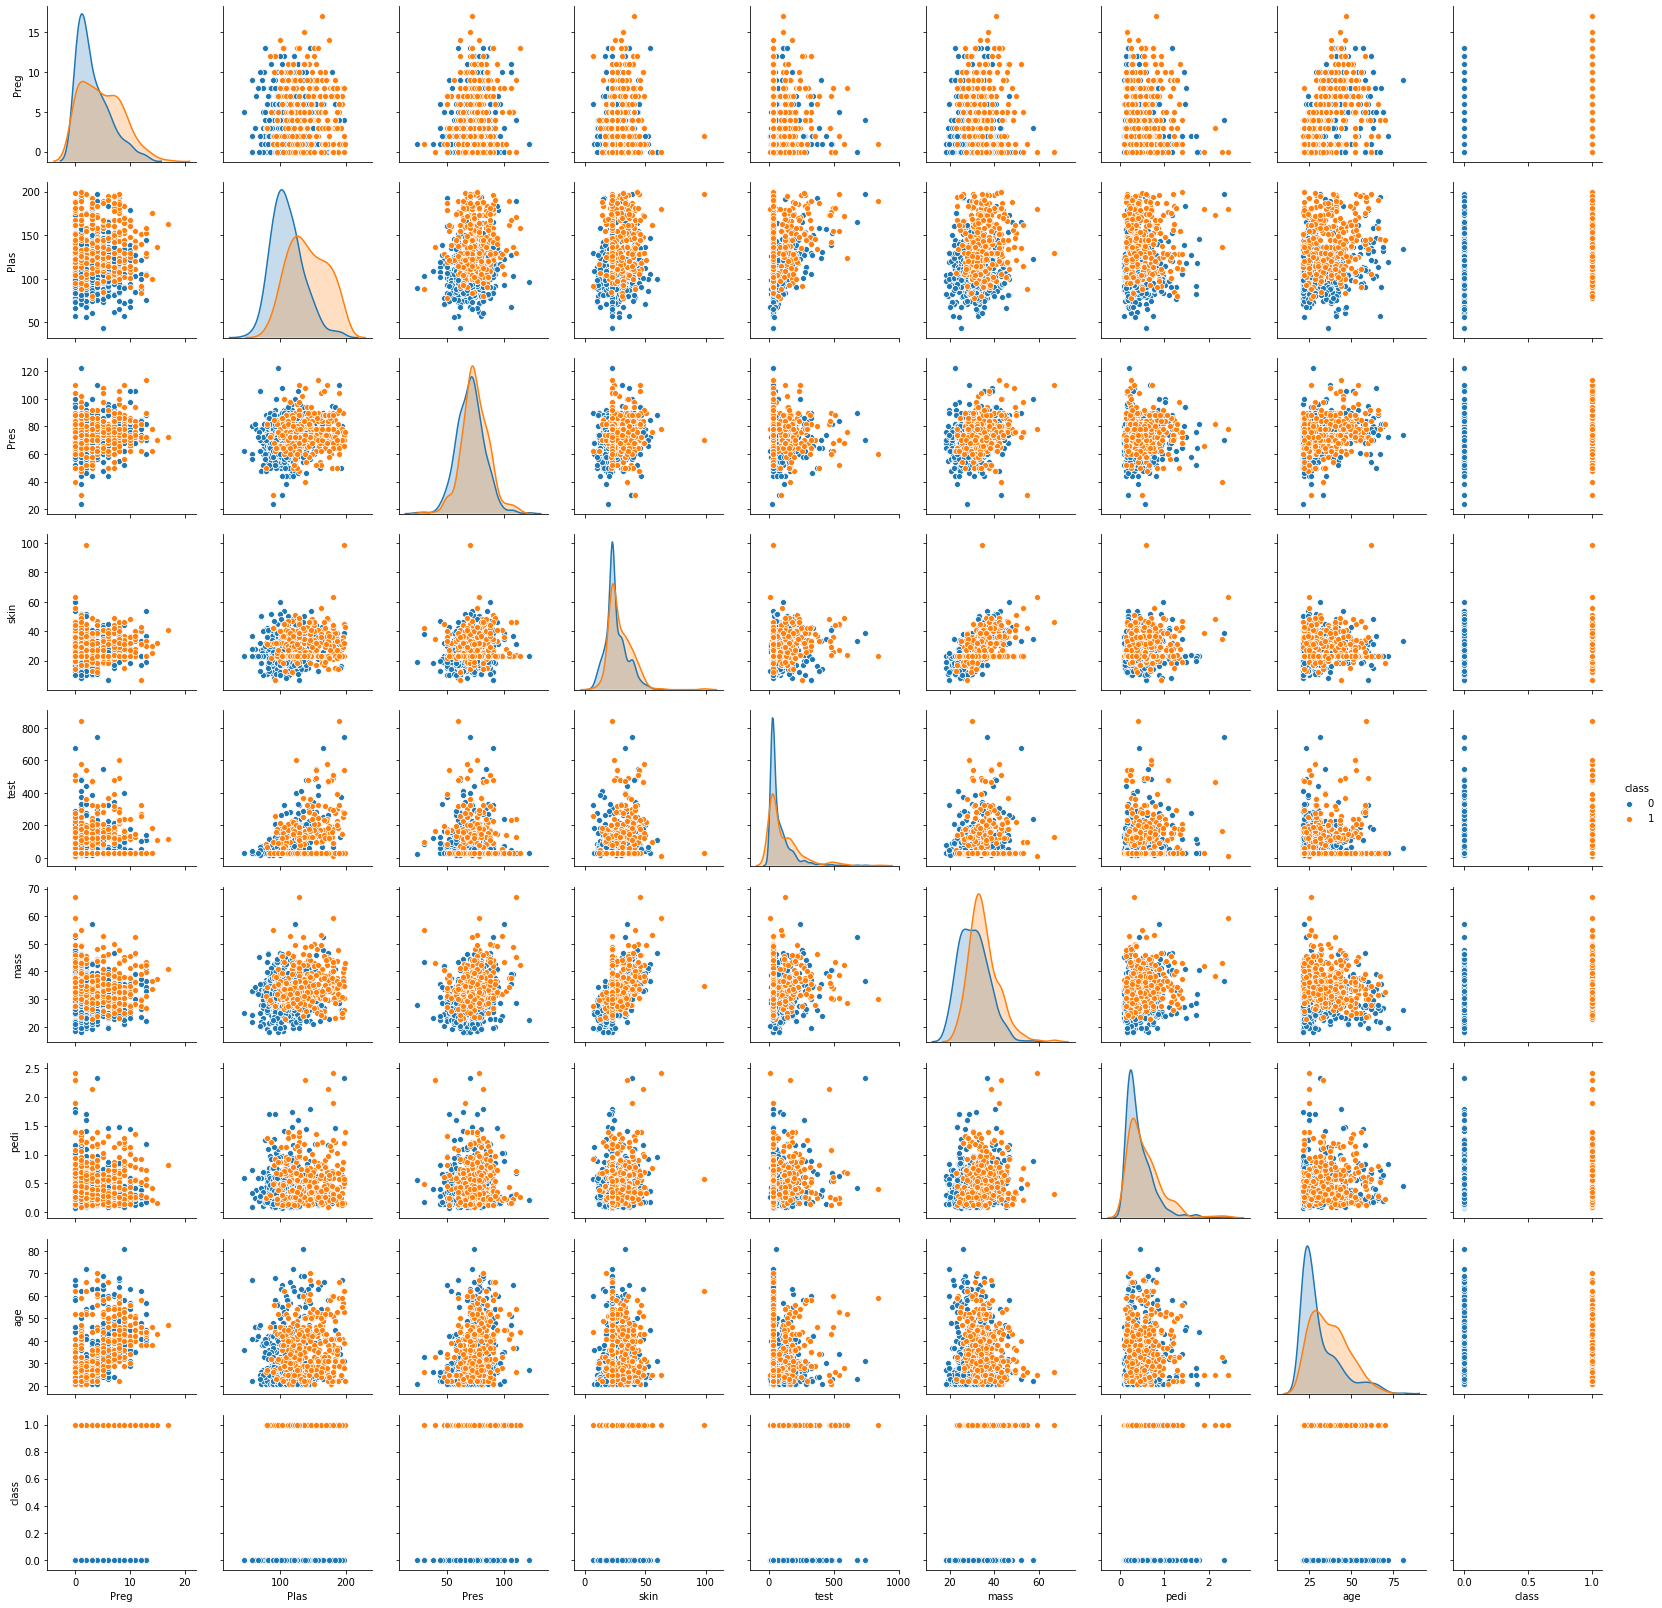

In [20]:
sns.pairplot(data, hue='class')

Using the plot - infer the relationship between different variables

### Some inferences from the pairplot:
- class variable contains binary value of 0 and 1
- Distributions of Features Pres, skin, test, peddi are almost similar for class 0 and 1
- Features skin and mass seemed to have linear relations
- Features with Right heavy tails: skin, test, peddi, age
- Pres is having almost normal distribtion
- Pres, skin and test are having overlapping distribtion for both class 0 and 1. So, these may not be good feature for Classification.
- Plas, mass age distirbution are separated for class 0 and 1. So these will be good criteria for the Classification

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [21]:
X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [22]:
X_train.shape

(537, 8)

In [23]:
X_test.shape

(231, 8)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [26]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')

In [28]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [29]:
print('Accuracy of the Model: ', dt_model.score(X_test, y_test))

Accuracy of the Model:  0.7186147186147186


Print the feature importance of the decision model - Optional

In [30]:
print('Feature Importance of the Model:')
dt_model.feature_importances_

Feature Importance of the Model:


array([0.10333159, 0.25868569, 0.14601377, 0.04156042, 0.00579009,
       0.23472193, 0.09573047, 0.11416604])

In [31]:
from sklearn.metrics import confusion_matrix

y_pred = dt_model.predict(X_test)

print('Confusion Matrix:')
confusion_matrix(y_test, y_pred)

Confusion Matrix:


array([[111,  35],
       [ 30,  55]], dtype=int64)